<a href="https://colab.research.google.com/github/Svarich-11908/machine-learning/blob/main/11_009_Svarich_FinalWork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Самостоятельная работа**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# **Дано:**
Даны участки телеметрии работы оборудования (9 датчиков/столбцов, 128 сек) соответствующие шести различным режимам. Каждый режим работает 128 сек: Один режим – 128 секунд/строк

In [4]:
X_test = np.load('X_test.npy')
X_train = np.load('X_train.npy')
y_test = np.load('y_test.npy')
y_train = np.load('y_train.npy')

Объединим тестовые и тренировочные данные для последующей работы с ними


In [5]:
y_file_paths = ['y_test.npy', 'y_train.npy']
X_file_paths = ['X_test.npy', 'X_train.npy']

X_array = np.concatenate([np.load(file_path) for file_path in X_file_paths], axis=0)
y_array = np.concatenate([np.load(file_path) for file_path in y_file_paths], axis=0)

np.save('X_full.npy', X_array)
np.save('y_full.npy', y_array)
X_full = np.load('X_full.npy')
X_full

array([[[ 1.041216  , -0.2697959 ,  0.02377977, ...,  0.4374637 ,
          0.5313492 ,  0.1365279 ],
        [ 1.041803  , -0.280025  ,  0.07629271, ...,  0.4682641 ,
          0.7210685 ,  0.09762239],
        [ 1.039086  , -0.2926631 ,  0.1474754 , ...,  0.4982574 ,
          0.5203284 ,  0.08355578],
        ...,
        [ 0.9930164 , -0.2599865 ,  0.1443951 , ..., -0.00505586,
         -0.07734212,  0.03225787],
        [ 0.9932414 , -0.2620643 ,  0.1447033 , ..., -0.02043194,
         -0.072973  ,  0.02700848],
        [ 0.9943906 , -0.2641348 ,  0.1454939 , ..., -0.02999741,
         -0.07064875,  0.03054609]],

       [[ 0.9991921 , -0.2649349 ,  0.1256164 , ...,  0.1702878 ,
         -0.06137388,  0.05509624],
        [ 0.9946787 , -0.2532142 ,  0.1256249 , ...,  0.1752221 ,
         -0.09536355,  0.04334361],
        [ 0.9935518 , -0.2565887 ,  0.1163814 , ...,  0.1308618 ,
         -0.1464495 ,  0.05239831],
        ...,
        [ 1.001861  , -0.2619359 ,  0.1527878 , ..., -

In [7]:
y_full = np.load('y_full.npy')
y_full.shape

(10299, 6)

In [8]:
X_full = X_full.reshape(-1, 9)
X_full.shape

(1318272, 9)

In [9]:
y_full = np.repeat(y_full, np.repeat(np.array([128]), y_full.shape[0]), axis=0)
y_full.shape

(1318272, 6)

Преобразуем целевую переменную из вектора в целочисленное значение - обозначение режима от 1 до 6

In [10]:
y_full_int = np.argmax(y_full, axis=1)
y_full_int.shape

(1318272,)

Создадим датафрейм из объединенных данных с обозначением столбцов как номера датчиков от 0 до 8


In [14]:
df = pd.DataFrame(X_full, columns=['0','1', '2', '3','4','5','6','7','8'])
df

,0,1,2,3,4,5,6,7,8
0,1.041216,-0.269796,0.023780,0.011653,-0.029399,0.106826,0.437464,0.531349,0.136528
1,1.041803,-0.280025,0.076293,0.013109,-0.039729,0.152455,0.468264,0.721069,0.097622
2,1.039086,-0.292663,0.147475,0.011269,-0.052406,0.216846,0.498257,0.520328,0.083556
3,1.054768,-0.292384,0.139906,0.027831,-0.052106,0.202581,0.479396,0.372625,0.022861
4,1.028376,-0.285826,0.119934,0.002318,-0.045470,0.176010,0.389894,0.414541,-0.025939
...,...,...,...,...,...,...,...,...,...
1318267,0.991497,-0.486260,-0.205803,0.022358,-0.280075,-0.180578,0.973228,1.083094,-0.226884
1318268,0.945067,-0.453405,-0.180733,-0.024451,-0.248612,-0.153920,1.004266,1.187832,-0.313591
1318269,0.898095,-0.397775,-0.156105,-0.071907,-0.194322,-0.127555,1.004855,1.156645,-0.362512
1318270,0.828372,-0.349247,-0.122798,-0.142209,-0.147070,-0.092367,1.015589,1.100750,-0.383989


In [15]:
df['target'] = y_full_int
df

,0,1,2,3,4,5,6,7,8,target
0,1.041216,-0.269796,0.023780,0.011653,-0.029399,0.106826,0.437464,0.531349,0.136528,4
1,1.041803,-0.280025,0.076293,0.013109,-0.039729,0.152455,0.468264,0.721069,0.097622,4
2,1.039086,-0.292663,0.147475,0.011269,-0.052406,0.216846,0.498257,0.520328,0.083556,4
3,1.054768,-0.292384,0.139906,0.027831,-0.052106,0.202581,0.479396,0.372625,0.022861,4
4,1.028376,-0.285826,0.119934,0.002318,-0.045470,0.176010,0.389894,0.414541,-0.025939,4
...,...,...,...,...,...,...,...,...,...,...
1318267,0.991497,-0.486260,-0.205803,0.022358,-0.280075,-0.180578,0.973228,1.083094,-0.226884,1
1318268,0.945067,-0.453405,-0.180733,-0.024451,-0.248612,-0.153920,1.004266,1.187832,-0.313591,1
1318269,0.898095,-0.397775,-0.156105,-0.071907,-0.194322,-0.127555,1.004855,1.156645,-0.362512,1
1318270,0.828372,-0.349247,-0.122798,-0.142209,-0.147070,-0.092367,1.015589,1.100750,-0.383989,1


In [16]:
df.isnull().sum()

0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
target    0
dtype: int64

Пропусков в датасете нет

Посмотрим на распределение данных по шести возможным режимам

<Axes: xlabel='target', ylabel='count'>

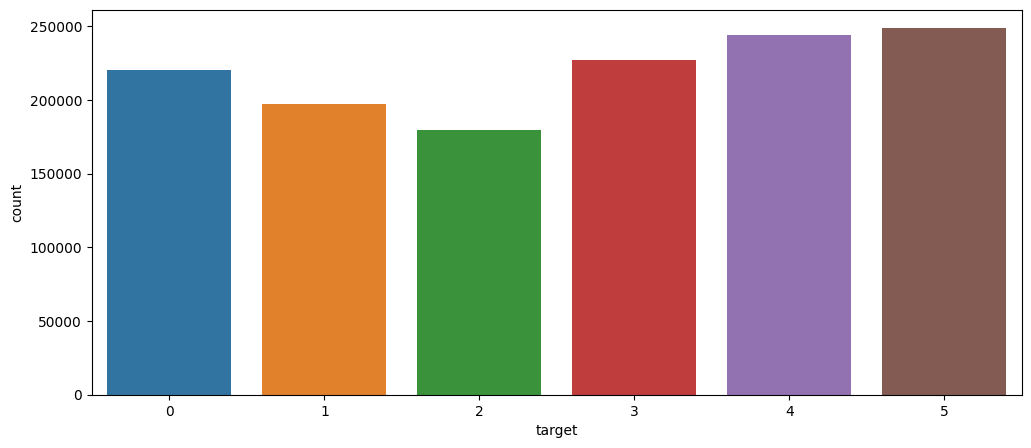

In [21]:
plt.figure(figsize=(12, 5))
sn.countplot(df, x="target")

Посмотрим на корреляцию данных датчиков

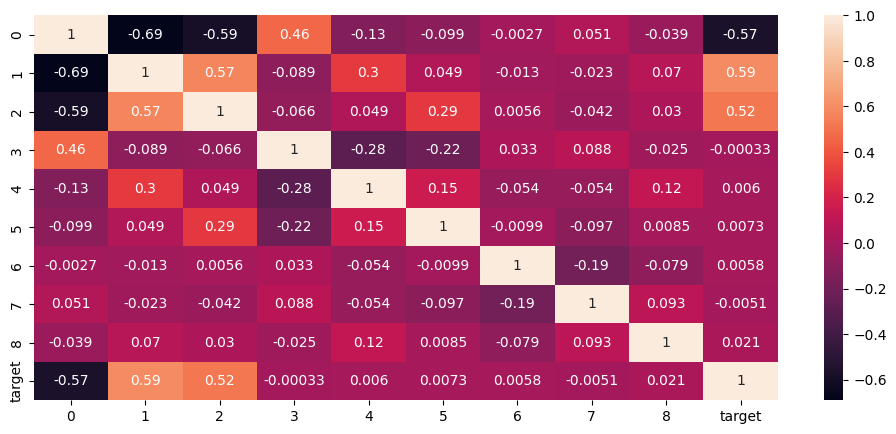

In [22]:
plt.figure(figsize=(12, 5))
corr_matrix = df.corr()
sn.heatmap(corr_matrix, annot=True)
plt.show()

Можно заметить, что на с целевой переменной коррелируют данные первого, второго и нулевого датчиков; также можно отметить сильную отрицательную корреляцию первого признака со вторым и нулевым датчиками.

Отделим данные от целевой переменной, чтобы произвести масштабирование данных на отрезок от 0 до 1

In [23]:
X = df.iloc[:, : 9]
y = df.iloc[:, -1::]
sc = MinMaxScaler()
X_sc = sc.fit_transform(X)

Применим алгоритм SelectKBest для поиска наиболее значимых столбцов. Выберу 6 первых столбцов

In [24]:
selector = SelectKBest(chi2, k=6)
X_new = selector.fit_transform(X_sc, y)
features_names = selector.get_feature_names_out()
print(features_names)

['x0' 'x1' 'x2' 'x4' 'x6' 'x8']


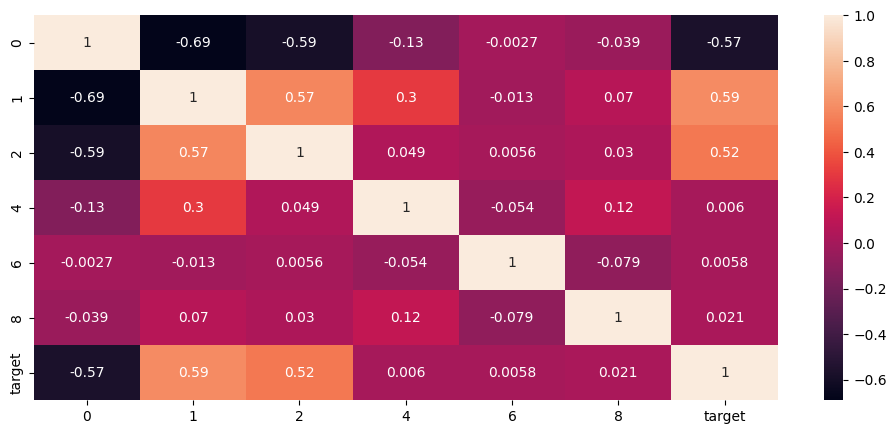

In [25]:
df_new = pd.DataFrame(X_new, columns = ['0','1','2','4','6','8'])
plt.figure(figsize=(12, 5))
df_new['target'] = y_full_int
corr_matrix = df_new.corr()
sn.heatmap(corr_matrix, annot=True)
plt.show()

In [26]:
df_new

,0,1,2,4,6,8,target
0,0.565943,0.469929,0.569464,0.566881,0.581735,0.565323,4
1,0.566164,0.466283,0.587442,0.562431,0.585200,0.557738,4
2,0.565144,0.461779,0.611812,0.556969,0.588574,0.554996,4
3,0.571030,0.461878,0.609220,0.557098,0.586452,0.543162,4
4,0.561124,0.464216,0.602383,0.559957,0.576384,0.533647,4
...,...,...,...,...,...,...,...
1318267,0.547281,0.392774,0.490866,0.458888,0.642007,0.494469,1
1318268,0.529854,0.404485,0.499449,0.472443,0.645499,0.477564,1
1318269,0.512223,0.424313,0.507880,0.495831,0.645565,0.468026,1
1318270,0.486052,0.441610,0.519283,0.516188,0.646773,0.463838,1


Поделим преобразованные данные на тестовую и тренировочную выборки с размером 0.7 и создадим функцию для подсчета метрик


In [31]:
def get_metrics(model):
  y_pred = model.predict(X_test)
  cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
  print('confusion matrix: ')
  print(cnf_matrix)
  print('classification report:')
  print(classification_report(y_test, y_pred))
  precision = precision_score(y_test, y_pred, average='weighted')
  recall = recall_score(y_test, y_pred, average='weighted')
  print("precision:", precision)
  print("recall:", recall)
  y_test_binarized = label_binarize(y_test, classes=[0,1,2,3,4,5])
  y_pred_proba = model.predict_proba(X_test)
  roc_auc = roc_auc_score(y_test_binarized, y_pred_proba, multi_class='ovr', average='weighted')
  print("roc-auc:", roc_auc)

In [34]:
df_new.columns = df_new.columns.astype(str)
X_train, X_test, y_train, y_test = train_test_split(df_new.iloc[:, : 6], df_new['target'], train_size=0.7, random_state=42)

In [35]:
df_new.iloc[:, : 6]

,0,1,2,4,6,8
0,0.565943,0.469929,0.569464,0.566881,0.581735,0.565323
1,0.566164,0.466283,0.587442,0.562431,0.585200,0.557738
2,0.565144,0.461779,0.611812,0.556969,0.588574,0.554996
3,0.571030,0.461878,0.609220,0.557098,0.586452,0.543162
4,0.561124,0.464216,0.602383,0.559957,0.576384,0.533647
...,...,...,...,...,...,...
1318267,0.547281,0.392774,0.490866,0.458888,0.642007,0.494469
1318268,0.529854,0.404485,0.499449,0.472443,0.645499,0.477564
1318269,0.512223,0.424313,0.507880,0.495831,0.645565,0.468026
1318270,0.486052,0.441610,0.519283,0.516188,0.646773,0.463838


В качестве первой модели будем использовать логистическую регрессию.

In [36]:
logreg = LogisticRegression(random_state=16,solver='lbfgs',class_weight='balanced', max_iter=10000)
logreg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=10000, random_state=16)

In [37]:
get_metrics(logreg)

confusion matrix: 
[[ 5347 21262 15548  4614 19373    39]
 [ 3673 40758  3516  2371  8774    45]
 [ 4629 12350 16594  7687 12418   434]
 [  862  1201  8731 54657  3163     0]
 [ 6725 19427  9436 10355 26750     0]
 [    0    55     0    12     0 74676]]
classification report:
              precision    recall  f1-score   support

           0       0.25      0.08      0.12     66183
           1       0.43      0.69      0.53     59137
           2       0.31      0.31      0.31     54112
           3       0.69      0.80      0.74     68614
           4       0.38      0.37      0.37     72693
           5       0.99      1.00      1.00     74743

    accuracy                           0.55    395482
   macro avg       0.51      0.54      0.51    395482
weighted avg       0.52      0.55      0.53    395482

precision: 0.5248778045243319
recall: 0.553203432773173
roc-auc: 0.842266850235102


 Метрики не пересекают порога 0.88, попробуем поискать параметры

In [39]:
from sklearn.model_selection import GridSearchCV

parameters = [{'penalty':['l1','l2']},
              {'C':[1, 10, 100, 1000]}]
grid_search = GridSearchCV(estimator = logreg,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(X_train, y_train)

KeyboardInterrupt: ignored

Компилируется очень долго

Используем классификатор - дерево решений

In [38]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
get_metrics(dt)

confusion matrix: 
[[57000  3890  4866    97   330     0]
 [ 4253 51260  3339    56   228     1]
 [ 5125  3381 45334    77   179    16]
 [  118    56    95 67566   778     1]
 [  281   221   189   760 71242     0]
 [    0     0     8     0     0 74735]]
classification report:
              precision    recall  f1-score   support

           0       0.85      0.86      0.86     66183
           1       0.87      0.87      0.87     59137
           2       0.84      0.84      0.84     54112
           3       0.99      0.98      0.99     68614
           4       0.98      0.98      0.98     72693
           5       1.00      1.00      1.00     74743

    accuracy                           0.93    395482
   macro avg       0.92      0.92      0.92    395482
weighted avg       0.93      0.93      0.93    395482

precision: 0.9283302017279517
recall: 0.928327964357417
roc-auc: 0.957599599562647


Следом алгоритм случайного леса

In [40]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
get_metrics(rf)

confusion matrix: 
[[60427  2970  2581    31   174     0]
 [ 2923 54220  1861     8   125     0]
 [ 4305  2808 46857    40   101     1]
 [   72    16    43 68018   465     0]
 [  201   154    38   405 71895     0]
 [    0     0     0     0     0 74743]]
classification report:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90     66183
           1       0.90      0.92      0.91     59137
           2       0.91      0.87      0.89     54112
           3       0.99      0.99      0.99     68614
           4       0.99      0.99      0.99     72693
           5       1.00      1.00      1.00     74743

    accuracy                           0.95    395482
   macro avg       0.95      0.95      0.95    395482
weighted avg       0.95      0.95      0.95    395482

precision: 0.9512800083571684
recall: 0.951143162014959
roc-auc: 0.9963863522628983


Оба алгориртма хорошо справляются, но второй лучше